# Homework 3

# Task 2 (Coding)

You should find:
1. simulate this mechanism (obtain all positions);
2. Find absolute, transport and relative velocities and accelerations for M;
3. Find t, when M reaches O point;
4. draw plots $v_{rel}, v_{tr}, a_{tr}, a_{rel}, a$ respect to time.

Needed variables:
$\phi_e = f_1(t) = 0.2t^3 + t;$
$OM = s_r = f_2(t) = 5\sqrt2(t^2 + t)$
$a = 60, α = 45.$


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sympy import solve, diff, sin, cos, lambdify, sqrt
from sympy.abc import symbols
from IPython.display import HTML, display

In [15]:
num_frames = 120
t_start = 0
t_end = 3
t_values = np.linspace(t_start, t_end, num_frames)

O1_O = 60
alpha = np.radians(45)

# Set the needed variables for further solving using sympy
t, phi, x_M, y_M, k_OO2, b_OO2, px1, px2, py1, py2, k, b, R, O_M, O1_M1 = symbols('t, phi, x_M, y_M, k_OO2, b_OO2, px1, px2, py1, py2, k, b, R, O_M, O1_M1')


def multify(params, *args):
    lambdas = []
    for func in args:
        lambdas.append(lambdify([params], func))

    return lambdas

# Lambdifying functions
phi_of_t = 0.2 * (t**3) + t
func_phi_ = lambdify(t, phi_of_t)

# angular velocity
func_w_tr = 0.6 * (t ** 2) + 1
w_tr_ = lambdify(t, func_w_tr)


func_rel_vel_M = 10 * sqrt(2) * t + 5 * sqrt(2)
rel_vel_M_ = lambdify(t, func_rel_vel_M)

a_rel_M = 10 * sqrt(2)

func_acc_tang_M = 1.2 * t * R # = eps * R
acc_tang_M_ = multify((t, R), func_acc_tang_M)[0]

func_acc_norm_M = (R * (0.6 * (t ** 2) + 1))**2 / R # = V_tr^2/R
acc_norm_M_ = multify((t, R), func_acc_norm_M)[0]

func_vel_O = func_w_tr * O1_O

# Gives the length of the O_M
func_len_O_M = 5 * sqrt(2) * (t**2 + t)
len_O_M_ = lambdify(t, func_len_O_M)

# Gives the length of R
func_R = sqrt(O1_O**2 + O_M**2 - 2 * O1_O * O_M * cos(alpha))
R_ = lambdify(O_M, func_R)

# Finds coordinates of point O
func_x_O = O1_O*cos(phi)
func_y_O = O1_O*sin(phi)
x_O_, y_O_ = lambdify(phi, func_x_O), lambdify(phi, func_y_O)

# Finds coordinates of point O2
func_x_O2 = O1_O*cos(phi + np.radians(90))
func_y_O2 = O1_O*sin(phi + np.radians(90))
x_O2_, y_O2_ = lambdify(phi, func_x_O2), lambdify(phi, func_y_O2)


In [21]:
# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-80, 80)
ax.set_ylim(-80, 80)

line_O1_O, = ax.plot([], [], color='violet', lw = 2, label="O1_O")
line_O1_O2, = ax.plot([], [], color='indigo', lw = 2, label="O1_O2")
line_OO2, = ax.plot([], [], color='dodgerblue', lw = 2, label="O_O2")
line_R, = ax.plot([], [], color='royalblue', lw = 2, label="R")

point_M, = ax.plot([], [], 'bo', markersize = 3)
point_O, = ax.plot([], [], color='violet', markersize = 3)
point_O2, = ax.plot([], [], color='indigo', markersize = 3)


vel_tr_M_values = []
vel_rel_M_values = []
acc_tang_M_values = []
acc_norm_M_values = []
acc_transport = []
acc_rel = []

def update(frame):
    phi = func_phi_(t_values[frame])
    x_O, y_O = x_O_(phi), y_O_(phi)
    point_O.set_data(x_O, y_O)
    
    x_O2, y_O2 = x_O2_(phi), y_O2_(phi)
    point_O2.set_data(x_O2, y_O2)
    
    OM = len_O_M_(t_values[frame])
    R = R_(OM)    
    
    angle_beta = np.arcsin(np.sin(alpha)*OM / R) + phi
    x_M = R * cos(angle_beta)
    y_M = R * sin(angle_beta)
    
    line_O1_O.set_data([0, x_O], [0, y_O])
    line_O1_O2.set_data([0, x_O2], [0, y_O2])
    line_OO2.set_data([x_O, x_O2], [y_O, y_O2])
    line_R.set_data([0, x_M], [0, y_M])
    
    point_M.set_data((x_M, y_M))
    
    # Update the values
    vel_tr_M_values.append(w_tr_((t_values[frame])) * R) # the formula is omega * R 
    vel_rel_M_values.append(rel_vel_M_((t_values[frame])))
    acc_tan = acc_tang_M_((t_values[frame], R))
    acc_norm = acc_norm_M_((t_values[frame], R))
    acc_tang_M_values.append(acc_tang_M_((t_values[frame], R)))
    acc_norm_M_values.append(acc_norm_M_((t_values[frame], R)))
    acc_transport.append(np.sqrt(acc_tan**2 + acc_norm**2))
    acc_rel.append(10 * sqrt(2))
    
    
    return ...


plt.title('Rotational Translatory Motion')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
# plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc=(1.005, 0.7))
    
ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=60)

plt.gca().set_aspect(aspect='equal', adjustable='box')    
plt.grid(True)
# ani.save("task2_anim.gif")
display(HTML(ani.to_jshtml()))
plt.close(fig)


/tmp/ipykernel_83756/3678811537.py:26: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_O.set_data(x_O, y_O)
/tmp/ipykernel_83756/3678811537.py:29: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_O2.set_data(x_O2, y_O2)
/tmp/ipykernel_83756/3678811537.py:43: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_M.set_data((x_M, y_M))
/tmp/ipykernel_83756/3678811537.py:34: RuntimeWarning: invalid value encountered in arcsin
  angle_beta = np.arcsin(np.sin(alpha)*OM / R) + phi
/tmp/ipykernel_83756/3678811537.py:26: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_O.set_data(x_O, y_O)
/tmp/ipykernel_83756/3678811537.py:

## Plots

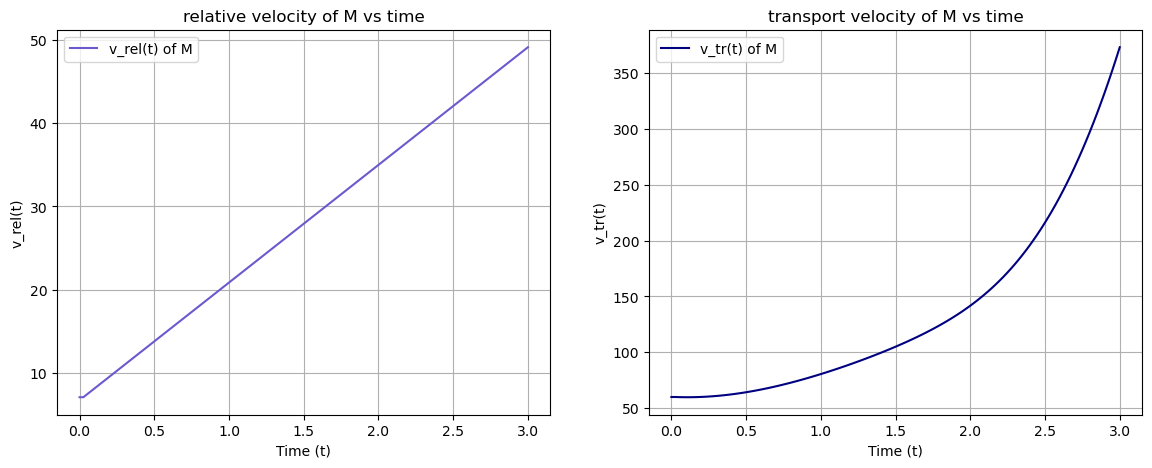

In [18]:
# We need to do this since in the update function we get one more frame
vel_rel_M_values = vel_rel_M_values[:num_frames]
vel_tr_M_values = vel_tr_M_values[:num_frames]

plt.figure(figsize=(14, 5))

# Plot 1: relative velocity of M vs Time
plt.subplot(1, 2, 1)
plt.plot(t_values, vel_rel_M_values, label='v_rel(t) of M', color="slateblue")
plt.title('relative velocity of M vs time')
plt.xlabel('Time (t)')
plt.ylabel('v_rel(t)')
plt.legend()
plt.grid(True)

# Plot 2: transport velocity of M vs Time
plt.subplot(1, 2, 2)
plt.plot(t_values, vel_tr_M_values, label='v_tr(t) of M', color="navy")
plt.title('transport velocity of M vs time')
plt.xlabel('Time (t)')
plt.ylabel('v_tr(t)')
plt.legend()

plt.grid(True)
plt.legend()
plt.savefig("task2_vel_plot.jpg")

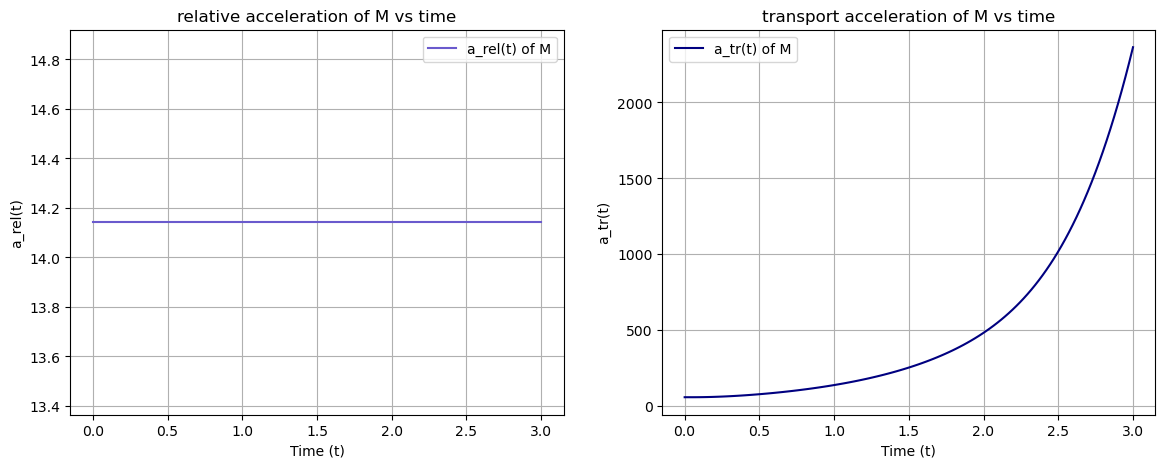

In [20]:
# We need to do this since in the update function we get one more frame
acc_rel = acc_rel[:num_frames]
acc_transport = acc_transport[:num_frames]

plt.figure(figsize=(14, 5))

# Plot 1: relative acceleration of M vs Time
plt.subplot(1, 2, 1)
plt.plot(t_values, acc_rel, label='a_rel(t) of M', color="slateblue")
plt.title('relative acceleration of M vs time')
plt.xlabel('Time (t)')
plt.ylabel('a_rel(t)')
plt.legend()
plt.grid(True)

# Plot 2: transport acceleration of M vs Time
plt.subplot(1, 2, 2)
plt.plot(t_values, acc_transport, label='a_tr(t) of M', color="navy")
plt.title('transport acceleration of M vs time')
plt.xlabel('Time (t)')
plt.ylabel('a_tr(t)')
plt.legend()
plt.grid(True)
plt.savefig("task2_acc_plot.jpg")